In [246]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

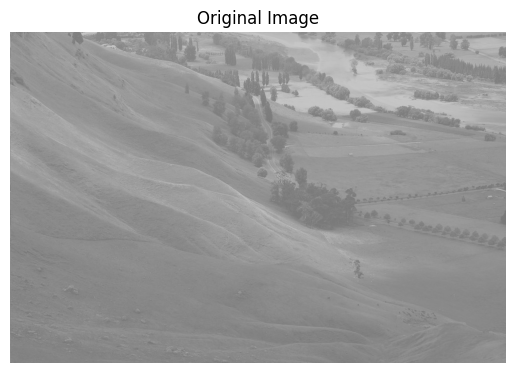

In [247]:
# 读取图像
img = cv2.imread('Unequalized.jpg')
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [248]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 转换为灰度图像
counts, bins = np.histogram(gray,bins=np.linspace(0,255,256)) # 计算直方图

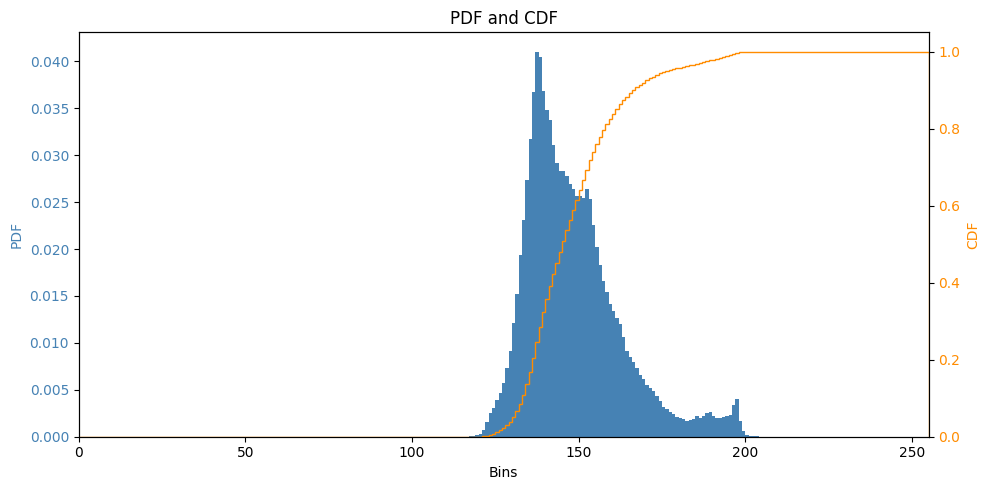

In [249]:
# 计算PDF
counts = np.array(counts)
pdf = counts / np.sum(counts)

cdf = np.cumsum(pdf)

# 创建一个图形对象
fig, ax1 = plt.subplots(figsize=(10, 5))
# 绘制PDF
ax1.stairs(pdf, bins, fill=True, label='PDF',color = "steelblue")
ax1.set_xlabel('Bins')
ax1.set_ylabel('PDF',color = "steelblue")
ax1.tick_params(axis='y',labelcolor = "steelblue")
ax1.set_xlim([0, 255])

# 创建第二个y轴，共享x轴
ax2 = ax1.twinx()
ax2.stairs(cdf, bins, label='CDF',color ='darkorange' )
ax2.set_ylabel('CDF',color='darkorange')
ax2.tick_params(axis='y',labelcolor='darkorange')

# 设置图形标题
plt.title('PDF and CDF')

# 显示图形
fig.tight_layout()
plt.show()

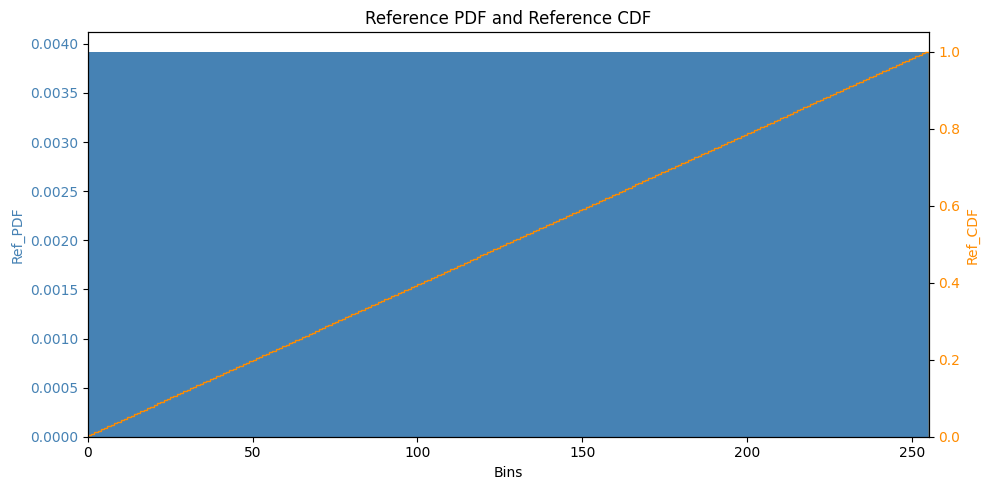

In [250]:
# 参考直方图
mat_counts = np.floor(np.ones(np.size(counts)) * (sum(counts)/len(counts)))

mat_pdf = mat_counts / np.sum(mat_counts)
mat_cdf = np.cumsum(mat_pdf)

fig, ax1 = plt.subplots(figsize=(10, 5))
# 绘制PDF
ax1.stairs(mat_pdf, bins, fill=True, label='PDF',color = "steelblue")
ax1.set_xlabel('Bins')
ax1.set_ylabel('Ref_PDF',color = "steelblue")
ax1.tick_params(axis='y',labelcolor = "steelblue")
ax1.set_xlim([0, 255])

# 创建第二个y轴，共享x轴
ax2 = ax1.twinx()
ax2.stairs(mat_cdf, bins, label='CDF',color ='darkorange' )
ax2.set_ylabel('Ref_CDF',color='darkorange')
ax2.tick_params(axis='y',labelcolor='darkorange')

# 设置图形标题
plt.title('Reference PDF and Reference CDF')

# 显示图形
fig.tight_layout()
plt.show()

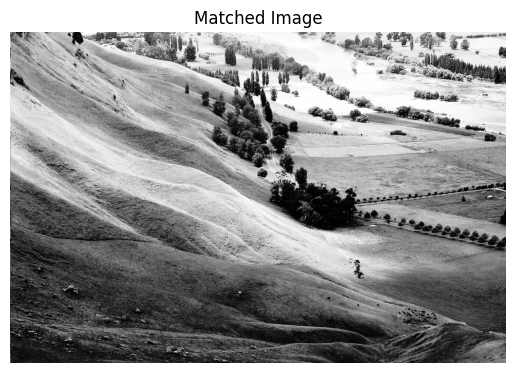

True

In [251]:
# 直方图匹配
map_table = np.around(255 * cdf)
map_table = map_table.astype(np.uint8)
equalized_img = map_table[gray]
plt.imshow(equalized_img, cmap='gray')
plt.title('Matched Image')
plt.axis('off')
plt.show()
cv2.imwrite('Matched.jpg', equalized_img)